In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import networkx as nx


### Transcriptomics data

In [29]:
rnaseq = pd.read_csv("/Users/SJp/Documents/PatStrat_poster/PatStrat-Personalized-Health-Technologies-Conference-2024/data/rnaseq_tpm_20220624.csv", index_col=0)

/var/folders/p3/70lzd1qn54d5cg3jhwm5szkm0000gp/T/ipykernel_22307/4157761712.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [30]:
rnaseq

,Unnamed: 1,SIDM00001,SIDM00002,SIDM00003,SIDM00005,SIDM00006,SIDM00007,SIDM00008,SIDM00009,SIDM00011,...,SIDM02071,SIDM02072,SIDM02073,SIDM02074,SIDM02075,SIDM02076,SIDM02077,SIDM02078,SIDM02079,SIDM02080
model_id,,,,,,,,,,,,,,,,,,,,,
model_name,NaN,MEC-1,NBsusSR,M14,MDA-MB-134-VI,MCC26,MCC13,MCAS,MC-1010,Malme-3M,...,HCM-SANG-1325-C15,HCM-SANG-1331-C18,HCM-SANG-1337-C18,HCM-SANG-1326-C15,HCM-SANG-1300-C18,HCM-SANG-1322-C15,HCM-SANG-1332-C18,HCM-SANG-1095-C25,HCM-SANG-1336-C15,HCM-SANG-1308-C25
dataset_name,NaN,Sanger & Broad Cell Lines RNASeq,Sanger & Broad Cell Lines RNASeq,Sanger & Broad Cell Lines RNASeq,Sanger & Broad Cell Lines RNASeq,Sanger & Broad Cell Lines RNASeq,Sanger & Broad Cell Lines RNASeq,Sanger & Broad Cell Lines RNASeq,Sanger & Broad Cell Lines RNASeq,Sanger & Broad Cell Lines RNASeq,...,Sanger Organoid RNASeq,Sanger Organoid RNASeq,Sanger Organoid RNASeq,Sanger Organoid RNASeq,Sanger Organoid RNASeq,Sanger Organoid RNASeq,Sanger Organoid RNASeq,Sanger Organoid RNASeq,Sanger Organoid RNASeq,Sanger Organoid RNASeq
data_source,NaN,Broad,Sanger,Sanger,Broad,Sanger,Sanger,Broad,Sanger,Broad,...,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger
gene_id,symbol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDG00001,A1BG,0.53,0.78,0.49,3.29,0.56,1.43,0.0,0.73,0.6,...,0.0,0.09,0.06,0.01,0.0,0.0,0.02,0.0,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIDG42474,ZZEF1,11.75,23.72,25.23,12.74,12.91,14.73,5.87,23.63,17.9,...,13.89,7.2,7.02,12.36,18.25,4.12,14.09,11.05,11.73,20.67
SIDG42475,ZZZ3,14.21,45.16,44.7,26.87,32.47,28.73,20.02,17.91,15.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDG42479,RSKR,8.32,11.52,7.59,28.42,10.91,6.83,2.76,18.05,5.65,...,0.89,1.25,1.86,3.56,0.78,0.37,0.98,1.31,1.31,6.29


In [37]:
rnaseq = rnaseq.transpose()
rnaseq = rnaseq.drop(columns=['model_name','data_source','gene_id'], index="Unnamed: 1")

In [193]:
rna_organoid = rnaseq[rnaseq['dataset_name'] == 'Sanger Organoid RNASeq'].drop(columns=['dataset_name'])
rna_organoid = rna_organoid.apply(pd.to_numeric)
rna_organoid = rna_organoid.loc[(rna_organoid.sum(axis=1) != 0), (rna_organoid.sum(axis=0) >  len(rna_organoid) * 2)]
rna_organoid

model_id,SIDG00003,SIDG00004,SIDG00011,SIDG00017,SIDG00019,SIDG00021,SIDG00026,SIDG00027,SIDG00028,SIDG00029,...,SIDG42462,SIDG42463,SIDG42464,SIDG42467,SIDG42468,SIDG42471,SIDG42472,SIDG42474,SIDG42480,SIDG42481
SIDM01266,0.49,0.02,2.08,22.25,22.67,0.04,0.82,11.20,5.03,25.80,...,9.43,4.66,15.03,2.66,7.61,3.42,68.04,2.60,5.98,1.65
SIDM01267,0.12,0.00,1.95,12.99,5.14,0.48,0.31,1.14,2.81,22.77,...,3.13,3.07,6.04,1.35,3.88,2.63,91.22,1.62,1.19,0.34
SIDM01268,3.01,0.00,1.33,56.73,49.47,0.10,1.34,8.01,8.93,43.95,...,15.32,19.22,123.21,5.36,14.01,9.45,124.76,10.16,4.83,4.03
SIDM01269,0.42,3.36,11.84,43.47,41.40,11.34,31.26,4.03,8.68,72.16,...,14.22,30.05,61.87,6.78,14.22,8.45,158.17,5.39,2.76,1.46
SIDM01270,0.00,0.01,4.22,45.35,29.55,0.11,0.62,16.37,5.47,102.15,...,52.06,32.05,184.05,5.26,15.92,13.49,119.40,7.82,4.97,1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIDM02076,0.42,0.00,6.01,20.48,16.68,3.06,10.54,0.75,5.46,29.07,...,4.16,9.31,36.98,1.98,9.79,2.52,76.28,4.12,5.36,1.03
SIDM02077,1.42,0.00,5.13,47.58,30.79,0.07,2.98,2.75,16.30,49.44,...,27.60,8.53,21.88,6.89,46.03,17.12,318.91,14.09,3.69,1.78
SIDM02078,1.91,0.09,23.02,30.77,83.63,8.29,24.39,1.74,5.37,72.60,...,11.87,16.10,29.31,8.62,18.19,5.69,194.70,11.05,5.69,1.99
SIDM02079,0.02,1.13,2.90,34.20,56.24,5.32,7.69,2.17,6.24,45.94,...,14.86,12.28,63.94,6.80,10.95,6.17,29.15,11.73,2.87,0.63


In [480]:
rna_cell_lines = rnaseq[rnaseq['dataset_name'] == 'Sanger & Broad Cell Lines RNASeq'].drop(columns=['dataset_name'])
rna_cell_lines = rna_cell_lines.apply(pd.to_numeric)
rna_cell_lines = rna_cell_lines.loc[(rna_cell_lines.sum(axis=1) != 0), (rna_cell_lines.sum(axis=0) > len(rna_cell_lines) * 2)]
rna_cell_lines = rna_cell_lines.fillna(0)
rna_cell_lines = rna_cell_lines + 1
rna_cell_lines

model_id,SIDG00002,SIDG00004,SIDG00011,SIDG00017,SIDG00019,SIDG00020,SIDG00021,SIDG00026,SIDG00027,SIDG00028,...,SIDG42467,SIDG42468,SIDG42469,SIDG42471,SIDG42472,SIDG42474,SIDG42475,SIDG42479,SIDG42480,SIDG42481
SIDM00001,3.43,1.33,1.53,25.23,14.45,1.00,1.00,1.00,1.00,19.28,...,8.72,9.99,3.86,10.09,29.10,12.75,15.21,9.32,7.03,3.06
SIDM00002,7.01,1.75,20.20,90.37,9.93,1.39,1.07,1.39,8.29,3.38,...,13.02,55.62,3.06,32.47,57.08,24.72,46.16,12.52,6.30,1.57
SIDM00003,12.54,30.14,1.00,64.69,13.96,2.77,1.00,1.00,16.63,29.83,...,7.96,18.05,14.27,30.87,180.63,26.23,45.70,8.59,6.89,2.94
SIDM00005,8.71,1.87,3.83,87.21,34.18,1.30,1.00,1.00,33.88,8.60,...,10.90,29.46,4.82,15.97,26.96,13.74,27.87,29.42,19.97,2.25
SIDM00006,8.53,87.17,15.32,30.21,7.72,1.45,1.00,1.07,13.95,20.15,...,9.28,16.92,17.66,28.87,526.84,13.91,33.47,11.91,5.79,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIDM01782,1.02,1.04,13.75,21.24,6.60,2.19,1.04,1.00,1.00,9.07,...,3.68,16.86,1.02,6.76,57.30,8.35,11.50,3.50,4.08,1.65
SIDM01820,1.05,1.03,1.03,17.13,6.70,1.08,18.65,9.73,4.45,6.83,...,8.43,14.81,1.00,7.80,139.53,14.88,14.00,3.48,5.79,3.14
SIDM01858,12.01,1.13,7.17,63.76,24.83,1.00,1.00,1.06,1.03,5.88,...,5.29,15.46,1.00,8.01,62.47,24.25,10.59,7.42,8.30,4.55
SIDM01859,16.88,1.11,1.04,57.83,13.22,1.00,1.00,1.00,1.15,12.99,...,15.79,25.06,13.22,14.67,29.06,17.48,35.75,7.72,12.10,2.20


### Proteomics Data

In [186]:
prot = pd.read_csv("/Users/SJp/Documents/PatStrat_poster/PatStrat-Personalized-Health-Technologies-Conference-2024/data/Protein_matrix_averaged_20221214.tsv", index_col=1, sep="\t")
prot = prot.drop(columns=['uniprot_id'], index='model_id')
prot = prot[prot.index.notnull()]
prot = prot.apply(pd.to_numeric)
prot = prot.drop(columns=prot.columns[prot.isna().sum() > len(prot) * 0.01])
prot = prot.fillna(0)
prot = prot + 1
prot

/var/folders/p3/70lzd1qn54d5cg3jhwm5szkm0000gp/T/ipykernel_22307/2549915420.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

,A0FGR8,A1L0T0,A5YKK6,A6NHQ2,A6NHR9,E9PAV3,E9PRG8,O00116,O00154,O00165,...,Q9Y676,Q9Y678,Q9Y679,Q9Y697,Q9Y6C9,Q9Y6D9,Q9Y6E2,Q9Y6I9,Q9Y6M9,Q9Y6W5
SIDM00499,5.39617,4.94650,4.82689,6.30255,4.96825,6.929460,5.41309,3.65129,5.69547,6.32811,...,5.51925,6.33222,4.44477,5.39270,6.70712,4.93095,5.91366,5.89011,5.29952,5.02736
SIDM00980,5.76661,4.94982,5.28959,6.33066,3.27779,6.501760,5.62686,5.70352,7.02883,5.84302,...,4.90779,6.46784,4.01648,5.86612,6.89721,4.55167,5.65967,5.24555,5.20928,5.63131
SIDM00982,4.69875,4.63222,4.72871,5.95304,4.03646,6.465730,4.77625,5.55811,6.45212,4.27448,...,3.39031,6.49150,4.17621,5.18343,5.44450,4.48402,6.44694,4.25961,4.30850,5.67628
SIDM01240,6.28560,5.18862,4.68118,7.73827,4.23758,5.514220,5.72557,5.31587,7.23785,5.32866,...,5.56745,4.62400,4.33097,5.59300,6.77189,4.94808,6.07595,4.23484,5.87070,4.46966
SIDM00807,5.83365,5.29831,3.65191,6.34766,4.31832,1.009423,5.16436,5.91521,3.78317,5.56051,...,4.27109,3.52114,4.93226,5.57386,6.85263,4.70676,3.64612,3.12470,5.14064,3.77781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIDM00410,5.00076,3.39225,5.62369,6.39024,5.34000,6.811190,5.69251,5.45164,7.06528,5.08904,...,3.59178,6.09872,3.82189,5.30060,6.05151,4.65161,6.03459,3.33836,3.86979,5.83664
SIDM00971,5.59909,5.97737,4.87465,5.11253,3.48061,6.458070,4.80750,1.00000,5.18412,4.90539,...,5.79143,6.64595,3.87510,5.24924,7.59624,4.20400,6.14312,5.01459,5.53141,5.22704
SIDM00586,4.88566,4.79112,4.35853,7.36901,4.48012,4.823180,4.17940,3.45368,3.85313,5.50887,...,5.49355,5.14526,4.52602,6.10276,7.15121,4.53892,5.01413,5.12694,5.38424,4.74879
SIDM00574,6.27265,5.20630,5.11807,5.63059,4.85918,6.505550,4.71295,5.92911,7.18303,5.13670,...,4.34872,6.61719,4.05160,5.22891,7.41217,5.14564,5.90679,4.51108,4.70968,5.65837


### Mutation data

In [282]:
mut = pd.read_csv('/Users/SJp/Documents/PatStrat_poster/PatStrat-Personalized-Health-Technologies-Conference-2024/data/mutations_all_20230202.csv')


In [276]:
protein_mutation = mut[['gene_id', 'model_id','protein_mutation']]
protein_mutation = protein_mutation[protein_mutation['protein_mutation'] != '-']
protein_mutation = protein_mutation[protein_mutation['protein_mutation'] != 'p.?']
label_encoder = LabelEncoder()
protein_mutation['mutation_id'] = label_encoder.fit_transform(protein_mutation['protein_mutation'])
protein_mutation.to_csv("data/protein_mutations.csv")
protein_mutation = protein_mutation[['gene_id', 'model_id','mutation_id']]
protein_mutation = protein_mutation.pivot_table(index='gene_id', columns='model_id', values='mutation_id')
protein_mutation.columns = list(protein_mutation.columns)
protein_mutation.index = list(protein_mutation.index)
protein_mutation = protein_mutation.transpose()
protein_mutation

,SIDG00001,SIDG00003,SIDG00004,SIDG00006,SIDG00010,SIDG00011,SIDG00012,SIDG00017,SIDG00019,SIDG00021,...,SIDG42464,SIDG42466,SIDG42467,SIDG42468,SIDG42469,SIDG42471,SIDG42472,SIDG42474,SIDG42475,SIDG42481
SIDM00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00002,NaN,NaN,NaN,73581.0,NaN,237926.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208434.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00007,42549.0,182017.0,NaN,40684.0,NaN,NaN,NaN,NaN,NaN,201526.0,...,NaN,48263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIDM02097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM02098,NaN,NaN,NaN,28131.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM02099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM02100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
rna_mutation = mut[['gene_id', 'model_id','rna_mutation']]
rna_mutation = rna_mutation[rna_mutation['rna_mutation'] != '-']
rna_mutation = rna_mutation[rna_mutation['rna_mutation'] != 'r.?']
label_encoder = LabelEncoder()
rna_mutation['mutation_id'] = label_encoder.fit_transform(rna_mutation['rna_mutation'])
rna_mutation.to_csv("data/rna_mutation.csv")
rna_mutation = rna_mutation[['gene_id', 'model_id','mutation_id']]
rna_mutation = rna_mutation.pivot_table(index='gene_id', columns='model_id', values='mutation_id')
rna_mutation.columns = list(rna_mutation.columns)
rna_mutation.index = list(rna_mutation.index)
rna_mutation = rna_mutation.transpose()
rna_mutation

,SIDG00001,SIDG00003,SIDG00004,SIDG00006,SIDG00010,SIDG00011,SIDG00012,SIDG00017,SIDG00019,SIDG00021,...,SIDG42464,SIDG42466,SIDG42467,SIDG42468,SIDG42469,SIDG42471,SIDG42472,SIDG42474,SIDG42475,SIDG42481
SIDM00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00002,NaN,NaN,NaN,86493.0,NaN,191884.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36360.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00007,140114.333333,22452.0,NaN,217219.0,NaN,NaN,NaN,NaN,NaN,194655.0,...,NaN,103987.0,NaN,NaN,NaN,68324.0,NaN,NaN,NaN,127095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIDM02097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,104601.0,NaN,NaN,NaN,NaN,NaN,NaN
SIDM02098,NaN,144031.0,NaN,240929.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM02099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM02100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
cdna_mutation = mut[['gene_id', 'model_id','cdna_mutation']]
cdna_mutation = cdna_mutation[cdna_mutation['cdna_mutation'] != '-']
cdna_mutation = cdna_mutation[cdna_mutation['cdna_mutation'] != 'c.?']
label_encoder = LabelEncoder()
cdna_mutation['mutation_id'] = label_encoder.fit_transform(cdna_mutation['cdna_mutation'])
cdna_mutation.to_csv("data/rna_mutation.csv")
cdna_mutation = cdna_mutation[['gene_id', 'model_id','mutation_id']]
cdna_mutation = cdna_mutation.pivot_table(index='gene_id', columns='model_id', values='mutation_id')
cdna_mutation.columns = list(cdna_mutation.columns)
cdna_mutation.index = list(cdna_mutation.index)
cdna_mutation = cdna_mutation.transpose()
cdna_mutation

,SIDG00001,SIDG00003,SIDG00004,SIDG00006,SIDG00010,SIDG00011,SIDG00012,SIDG00017,SIDG00019,SIDG00021,...,SIDG42464,SIDG42466,SIDG42467,SIDG42468,SIDG42469,SIDG42471,SIDG42472,SIDG42474,SIDG42475,SIDG42481
SIDM00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00002,NaN,NaN,NaN,71779.0,NaN,986.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19845.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00007,199889.0,187392.0,NaN,172774.0,NaN,NaN,NaN,NaN,NaN,151717.0,...,NaN,73858.0,NaN,NaN,NaN,48135.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIDM02097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM02098,NaN,NaN,NaN,191819.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM02099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM02100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [297]:
vaf = mut[['gene_id', 'model_id','vaf']]
vaf = vaf[vaf['vaf'] != '-']
vaf = vaf[vaf['vaf'] != 'r.?']
label_encoder = LabelEncoder()
vaf['mutation_id'] = label_encoder.fit_transform(vaf['vaf'])
vaf.to_csv("data/vaf.csv")
vaf = vaf[['gene_id', 'model_id','mutation_id']]
vaf = vaf.pivot_table(index='gene_id', columns='model_id', values='mutation_id')
vaf.columns = list(vaf.columns)
vaf.index = list(vaf.index)
vaf = vaf.transpose()
vaf

,SIDG00001,SIDG00003,SIDG00004,SIDG00006,SIDG00010,SIDG00011,SIDG00012,SIDG00017,SIDG00019,SIDG00021,...,SIDG42466,SIDG42467,SIDG42468,SIDG42469,SIDG42471,SIDG42472,SIDG42474,SIDG42475,SIDG42479,SIDG42481
SIDM00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00002,NaN,NaN,NaN,6604.000000,NaN,4091.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00003,NaN,NaN,NaN,2996.000000,NaN,NaN,NaN,NaN,3796.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4784.000000,NaN,NaN,NaN
SIDM00006,NaN,NaN,NaN,4779.000000,6479.000000,NaN,NaN,4962.0,NaN,NaN,...,NaN,NaN,9815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIDM00007,5835.25,5475.00,6001.000000,4531.000000,4962.000000,NaN,NaN,9083.0,4392.5,4936.0,...,4741.0,NaN,NaN,5400.000000,4962.0,NaN,5735.000000,NaN,NaN,9815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIDM02097,NaN,4209.00,3915.000000,5101.000000,NaN,9815.000000,NaN,NaN,2375.0,NaN,...,NaN,NaN,4750.5,8053.500000,4431.0,NaN,NaN,NaN,NaN,NaN
SIDM02098,NaN,5398.00,4772.000000,5245.666667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9815.0,NaN,4386.500000,3550.0,3417.0,NaN,NaN,NaN,NaN
SIDM02099,NaN,5499.75,6736.333333,3786.000000,4479.666667,NaN,NaN,NaN,3250.0,NaN,...,NaN,NaN,NaN,3508.000000,9815.0,5446.0,5480.333333,NaN,NaN,NaN
SIDM02100,NaN,NaN,5645.000000,6393.000000,NaN,NaN,NaN,NaN,4070.0,NaN,...,NaN,NaN,NaN,9815.000000,1147.0,9065.0,9815.000000,NaN,NaN,9815.0


In [298]:
# Convert lists to sets
sets = [set(lst) for lst in [set(rna_cell_lines.index), set(prot.index), set(rna_mutation.index), set(protein_mutation.index),set(cdna_mutation.index), set(vaf.index)]]

# Find intersection of all sets
model_ids = set.intersection(*sets)
len(model_ids)

938

In [524]:
rna_cell_lines = rna_cell_lines[rna_cell_lines.index.isin(model_ids)]
prot = prot[prot.index.isin(model_ids)]
rna_mutation = rna_mutation[rna_mutation.index.isin(model_ids)]
protein_mutation = protein_mutation[protein_mutation.index.isin(model_ids)]
cdna_mutation = cdna_mutation[cdna_mutation.index.isin(model_ids)]
vaf = vaf[vaf.index.isin(model_ids)]

### Read Data

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import networkx as nx
from src.data_fusion import DataFusion


In [2]:
rna_cell_lines = pd.read_csv("data/RNA_df.csv",index_col=0)
prot= pd.read_csv("data/PROTEIN_df.csv",index_col=0)
rna_mutation= pd.read_csv("data/RNA_MUT_df.csv",index_col=0)
protein_mutation= pd.read_csv("data/PROTEIN_MUT_df.csv",index_col=0)
cdna_mutation= pd.read_csv("data/CDNA_MUT_df.csv",index_col=0)
vaf= pd.read_csv("data/GENE_VAF_df.csv",index_col=0)

In [3]:
# Example data
modalities = [rna_cell_lines, prot, rna_mutation,protein_mutation,cdna_mutation,vaf]  # List of DataFrame objects
modalities_sortedindex = []
for df in modalities:
    df.sort_index(inplace=True)
    
    modalities_sortedindex.append(df)


top_mod = 10
k = 20
    
# Initialize and use DataFusion class
df_instance = DataFusion(modalities, top_mod, k)
[fused_net, node_feature_df,top_nodes_in_mod_net] = df_instance.data_fusion()


/opt/anaconda3/envs/patstrat/lib/python3.12/site-packages/sklearn/impute/_base.py:597: UserWarning: Skipping features without any observed values: [  317   463   492 ... 20989 21046 21152]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


: 

In [17]:
dose_response = pd.read_excel("/Users/SJp/Documents/PatStrat_poster/PatStrat-Personalized-Health-Technologies-Conference-2024/data/GDSC2_fitted_dose_response_27Oct23.xlsx")
dose_response = dose_response[dose_response['SANGER_MODEL_ID'].isin(rna_cell_lines.index)]
dose_response.index = dose_response['SANGER_MODEL_ID'].values
dose_response = dose_response[['TCGA_DESC', 'DRUG_ID', 'DRUG_NAME','PUTATIVE_TARGET','PATHWAY_NAME']]
dose_response


,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME
SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication
SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication
SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication
SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication
SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication
...,...,...,...,...,...
SIDM00216,COREAD,2499,N-acetyl cysteine,Metabolism,Metabolism
SIDM00214,COREAD,2499,N-acetyl cysteine,Metabolism,Metabolism
SIDM00194,COREAD,2499,N-acetyl cysteine,Metabolism,Metabolism
SIDM00498,COREAD,2499,N-acetyl cysteine,Metabolism,Metabolism


InvalidParameterError: The 'M' parameter of randomized_svd must be an instance of 'numpy.ndarray' or a sparse matrix. Got            SIDG00002  SIDG00004  SIDG00011  SIDG00017  SIDG00019  SIDG00020  \
SIDM00018      11.81       1.04       1.00      38.57       3.67       1.00   
SIDM00023       1.03       1.00      38.54      45.47      14.11       2.32   
SIDM00040       1.00       1.12       3.17      33.76      24.11       1.00   
SIDM00041      10.84       1.04      45.78      52.72      10.57      22.31   
SIDM00042       1.10       1.28      95.97      32.71      11.32       1.00   
...              ...        ...        ...        ...        ...        ...   
SIDM01247      25.14       1.00      88.18      44.33      24.73       1.33   
SIDM01248      15.16       1.08      17.95      21.49       8.83       1.12   
SIDM01251       1.15       1.00       1.04      37.80      20.56       1.00   
SIDM01259      19.09       1.00       1.00      81.10      37.60       1.29   
SIDM01265       1.00       1.10       2.00      68.20       6.85       1.03   

           SIDG00021  SIDG00026  SIDG00027  SIDG00028  ...  SIDG42467  \
SIDM00018       1.00       1.00       6.33      25.42  ...      14.11   
SIDM00023       3.53       9.68      17.76      19.28  ...      11.51   
SIDM00040       1.00       1.00       2.79      12.27  ...       8.40   
SIDM00041       1.08       1.04      11.69      19.63  ...       8.05   
SIDM00042      20.24      23.23      13.65       4.28  ...      10.58   
...              ...        ...        ...        ...  ...        ...   
SIDM01247       1.00       1.00       1.00       5.94  ...       9.63   
SIDM01248       1.00       1.00      31.35      29.40  ...      28.15   
SIDM01251       1.00       1.00       1.04      27.83  ...      29.63   
SIDM01259       1.00       1.00       1.00       1.84  ...      28.22   
SIDM01265       1.03       1.00       1.32       2.16  ...       5.10   

           SIDG42468  SIDG42469  SIDG42471  SIDG42472  SIDG42474  SIDG42475  \
SIDM00018      33.63      13.03      28.59     256.70      12.96      42.03   
SIDM00023      16.27      12.69      34.96      72.27      21.14      22.09   
SIDM00040       5.71      11.34      15.36      76.67       9.09      28.97   
SIDM00041      19.94      12.39      42.57     527.97      23.28      40.79   
SIDM00042      31.63       1.28      11.25      43.66      17.41      17.62   
...              ...        ...        ...        ...        ...        ...   
SIDM01247      13.29       1.22      23.78       1.00      15.12      47.19   
SIDM01248      31.19      14.66      78.03     227.88      26.73      45.68   
SIDM01251      39.07      20.22      16.44     167.38      71.90      23.60   
SIDM01259      61.45       1.17      30.95      37.01      86.56      65.62   
SIDM01265      20.99       6.85      13.50      37.40      28.93      21.15   

           SIDG42479  SIDG42480  SIDG42481  
SIDM00018      26.18       6.29       1.25  
SIDM00023      20.73       3.03       2.62  
SIDM00040      10.71       5.36       1.40  
SIDM00041       3.17       7.20       1.81  
SIDM00042      34.39       6.19       1.21  
...              ...        ...        ...  
SIDM01247      45.91      10.62      22.98  
SIDM01248      13.03       2.67       2.21  
SIDM01251      33.23       5.68       4.15  
SIDM01259      30.45       7.23      16.06  
SIDM01265       8.04      11.88       4.84  

[938 rows x 16170 columns] instead.

In [52]:
modalities_sortedindex

[           SIDG00002  SIDG00004  SIDG00011  SIDG00017  SIDG00019  SIDG00020  \
 SIDM00018      11.81       1.04       1.00      38.57       3.67       1.00   
 SIDM00023       1.03       1.00      38.54      45.47      14.11       2.32   
 SIDM00040       1.00       1.12       3.17      33.76      24.11       1.00   
 SIDM00041      10.84       1.04      45.78      52.72      10.57      22.31   
 SIDM00042       1.10       1.28      95.97      32.71      11.32       1.00   
 ...              ...        ...        ...        ...        ...        ...   
 SIDM01247      25.14       1.00      88.18      44.33      24.73       1.33   
 SIDM01248      15.16       1.08      17.95      21.49       8.83       1.12   
 SIDM01251       1.15       1.00       1.04      37.80      20.56       1.00   
 SIDM01259      19.09       1.00       1.00      81.10      37.60       1.29   
 SIDM01265       1.00       1.10       2.00      68.20       6.85       1.03   
 
            SIDG00021  SIDG00026  SIDG

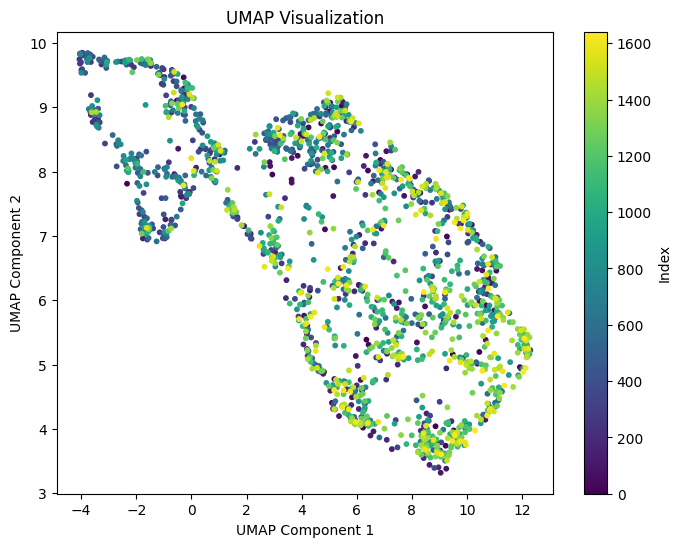

In [475]:
# Initialize UMAP model
reducer = umap.UMAP()
# Fit and transform the data to the lower-dimensional space
X_umap = reducer.fit_transform(prot_embedding)
# Plot the UMAP result
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], marker='o', c=np.arange(len(prot_embedding)), cmap='viridis', s=10)
plt.title('UMAP Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Index')
plt.show()

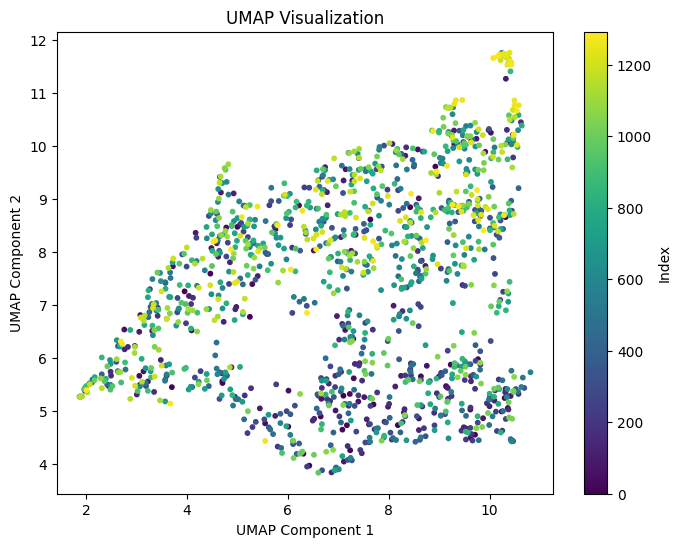

In [481]:
# Initialize UMAP model
reducer = umap.UMAP()
# Fit and transform the data to the lower-dimensional space
X_umap = reducer.fit_transform(rna_cell_lines)
# Plot the UMAP result
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], marker='o', c=np.arange(len(rna_cell_lines)), cmap='viridis', s=10)
plt.title('UMAP Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Index')
plt.show()